# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import covid19 as covid

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn import svm
from datetime import datetime

# Constants

In [2]:
COVID19_DATA = '/home/marcelo/Documents/IA/COVID19_2303/covid_19_data.csv'
COVID19_LINE_DATA = '/home/marcelo/Documents/IA/COVID19_2303/COVID19_line_list_data.csv'
COVID19_OPEN_LINE_DATA = '/home/marcelo/Documents/IA/COVID19_2303/COVID19_open_line_list.csv'
COVID19_CONFIRMED_CASES = '/home/marcelo/Documents/IA/COVID19_2303/time_series_covid_19_confirmed.csv'
COVID19_DEATHS = '/home/marcelo/Documents/IA/COVID19_2303/time_series_covid_19_deaths.csv'
COVID19_RECOVERED = '/home/marcelo/Documents/IA/COVID19_2303/time_series_covid_19_recovered.csv'

# Getting the info

In [3]:
covid19_cases = pd.read_csv(COVID19_CONFIRMED_CASES)

In [4]:
covid19_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [5]:
covid19 = pd.read_csv(COVID19_DATA)
covid19_line = pd.read_csv(COVID19_LINE_DATA)
covid19_open_line = pd.read_csv(COVID19_OPEN_LINE_DATA)
covid19_cases = pd.read_csv(COVID19_CONFIRMED_CASES)
covid19_deaths = pd.read_csv(COVID19_DEATHS)
covid19_recover = pd.read_csv(COVID19_RECOVERED)

In [6]:
country = covid19_cases['Country/Region'].unique()
country

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [7]:
list_countries = ['US', 'UK', 'Italy', 'Spain', 'France', 'Germany']
LATAM = ['Mexico', 'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Colombia', 'Venezuela', 'Colombia', 'Ecuador', 'Peru', 'Bolivia', 'Chile', 'Uruguay', 'Paraguay', 'Argentina', 'Brazil']
Centroamerica =['Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama']

In [8]:
df = covid19_cases
DFN = 5
degree = 1
min_cases = 1000
min_days =10
min_score = 0.99

# country = list_countries

# days = range(covid19_cases.shape[1]-4)
# days_future = range(covid19_cases.shape[1]-4+DFN)

# cases_real = pd.DataFrame(columns=country, index = days)
# cases_real_log = pd.DataFrame(columns=country, index = days)
# cases_projections = pd.DataFrame(columns=country, index = days_future)
# cases_projections_log = pd.DataFrame(columns=country, index = days_future)
# cases_projections_future_only = pd.DataFrame(columns=country, index = days_future)

# n=0
# m=[]
# for i in country:
#     prediction, score, data_country, days_infection= covid.predictor(df, i, DFN = DFN, 
#                                                                      plot = False, 
#                                                                      degree = degree, 
#                                                                      min_cases = min_cases, 
#                                                                      min_days = min_days, 
#                                                                      pres = min_score)
#     try:
#         cases_real[i] = data_country.cases
#         cases_real_log[i] = data_country['log cases']
#         cases_projections[i] = data_country['predicted cases']
#         cases_projections_log[i] = data_country['predicted log cases']        

#         rever_pred_cases = data_country['predicted cases'].iloc[::-1].reset_index()
#         cases_projections_future_only[i] = rever_pred_cases['predicted cases']
#         #print(rever_pred_cases)
#         cases_projections_future_only = cases_projections.drop('index')

#         m.append(i)
#         #print(f'{i} has {len(cases_real[i])} days since the first cornfirmed case')
#     except:
#         n+=1
# print(f'There are {len(m)} countries that fulfill the requirements')

# cols = cases_real.sum()!=0
# countries_selected_real = cases_real[cols[cols].index]
# countries_selected_real_log = cases_real_log[cols[cols].index]
# countries_selected_projections = cases_projections[cols[cols].index]
# countries_selected_projections_log = cases_projections_log[cols[cols].index]

# countries_selected_projections_future_only = cases_projections_future_only[cols[cols].index]
# countries_selected_projections_future_only = countries_selected_projections_future_only[::-1].reset_index().drop('index', axis = 1)

In [9]:
# countries_selected_projections_future_only.tail(20)

In [10]:
# fig = plt.figure(figsize=(12,10))
# plt.plot(countries_selected_real)
# plt.title('Cases per country')
# plt.xlabel(f'Days since {min_cases} cases')
# plt.ylim(countries_selected_real.min().min(), countries_selected_real.max().max())
# plt.xlim(0, (countries_selected_real.notnull()*1).sum().max())
# plt.grid()
# plt.legend(countries_selected_real.columns)
# plt.show()

In [11]:
# fig = plt.figure(figsize=(12,10))
# plt.plot(countries_selected_projections_future_only.tail(DFN))
# plt.title('Cases per country')
# #plt.yscale('log')
# plt.grid()
# plt.legend(countries_selected_projections.columns)
# plt.show()

In [12]:
real_cases, pred_cases, pred_cases_future = covid.data_analizer_by_params(df, DFN, 'Colombia', degree = 1, min_cases = 1, min_days = 1, min_score = 0)

In [13]:
# fig = plt.figure(figsize=(12,10))
# plt.plot(real_cases)
# plt.title('Cases per country')
# #plt.yscale('log')
# plt.grid()
# plt.legend(real_cases.columns)
# plt.show()

In [14]:
# fig = plt.figure(figsize=(12,5))
# plt.plot(pred_cases_future.tail(10))
# plt.title('Cases per country')
# #plt.yscale('log')
# plt.grid()
# plt.legend(pred_cases_future.columns)
# plt.show()

In [15]:
pred_cases_future.tail(5).round()

""
65
66
67
68
69


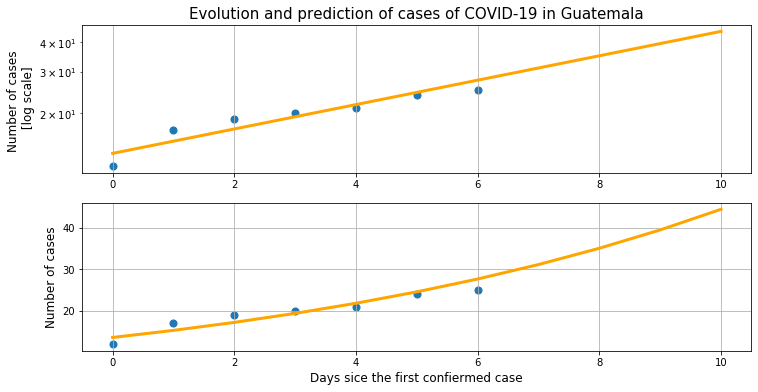

Days since first confirmed case was 7 days ago
Number of predicted cases in 4 days is 44.403250249210636
The score of this prediction is: 0.8629350595011914


In [16]:
prediction, score, data_country, days_infection = covid.predictor(df, 'Guatemala', DFN = 4, plot = True, degree = 1, pres = 0.0, min_cases = 10)

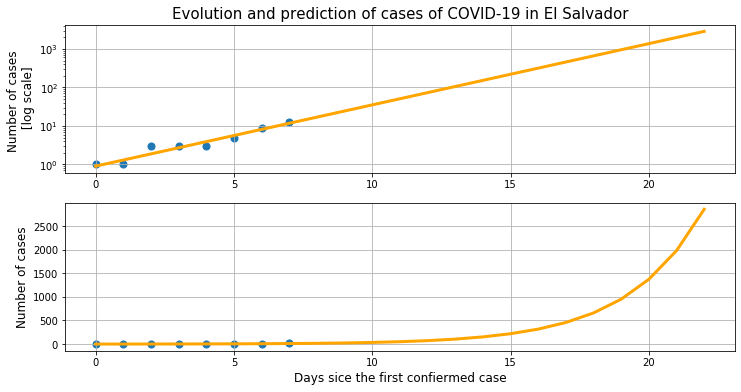

Days since first confirmed case was 8 days ago
Number of predicted cases in 15 days is 2854.0406877470723
The score of this prediction is: 0.9131987353278471


In [25]:
prediction, score, data_country, days_infection = covid.predictor(df, 'El Salvador', DFN = 15
                                                                  , plot = True, degree = 1, pres = 0.0, min_cases = 1)

In [26]:
prediction

array([9.04837418e-01, 1.30500143e+00, 1.88213784e+00, 2.71451260e+00,
       3.91500480e+00, 5.64641423e+00, 8.14353885e+00, 1.17450159e+01,
       1.69392449e+01, 2.44306197e+01, 3.52350522e+01, 5.08177411e+01,
       7.32918683e+01, 1.05705170e+02, 1.52453243e+02, 2.19875633e+02,
       3.17115551e+02, 4.57359787e+02, 6.59626984e+02, 9.51346774e+02,
       1.37207953e+03, 1.97888120e+03, 2.85404069e+03])

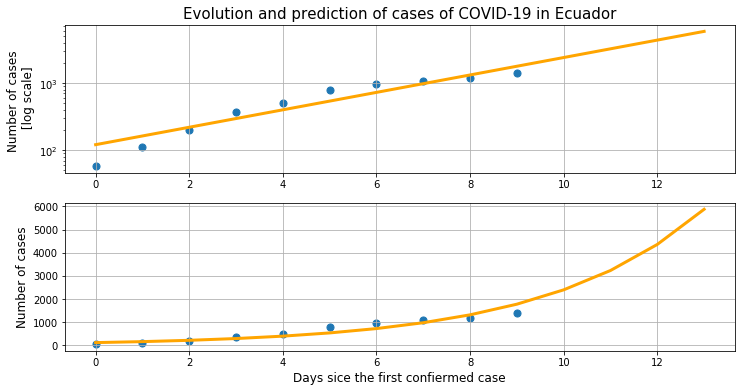

Days since first confirmed case was 10 days ago
Number of predicted cases in 4 days is 5875.11682763076
The score of this prediction is: 0.8991284709378249


In [18]:
prediction, score, data_country, days_infection = covid.predictor(df, 'Ecuador', DFN = 4, plot = True, degree = 1, pres = 0.0, min_cases = 50)

In [19]:
data_country.iloc[::-1].reset_index()

,index,cases,log cases,predicted cases,predicted log cases
0,13,NaN,NaN,5875.116828,8.678481
1,12,NaN,NaN,4358.262827,8.379829
2,11,NaN,NaN,3233.034410,8.081176
3,10,NaN,NaN,2398.320595,7.782524
4,9,1403,7.246368,1779.115514,7.483872
5,8,1173,7.067320,1319.778523,7.185219
6,7,1082,6.986566,979.034434,6.886567
7,6,981,6.888572,726.264601,6.587914
8,5,789,6.670766,538.755587,6.289262
9,4,506,6.226537,399.658171,5.990610


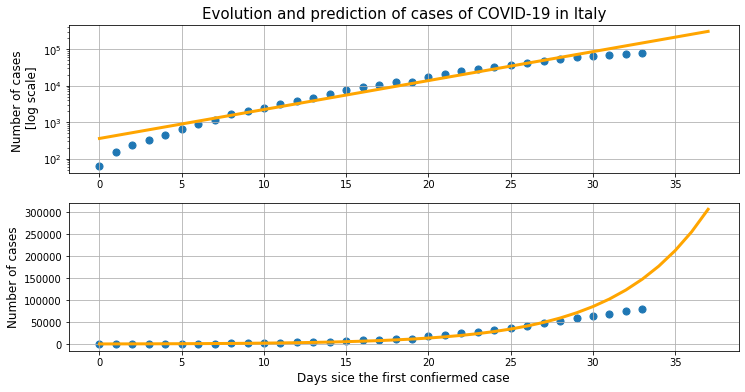

Days since first confirmed case was 34 days ago
Number of predicted cases in 4 days is 306400.96735876024
The score of this prediction is: 0.9516020675806451


In [20]:
prediction, score, data_country, days_infection = covid.predictor(df, 'Italy', DFN = 4, plot = True, degree = 1, pres = 0.0, min_cases = 50)

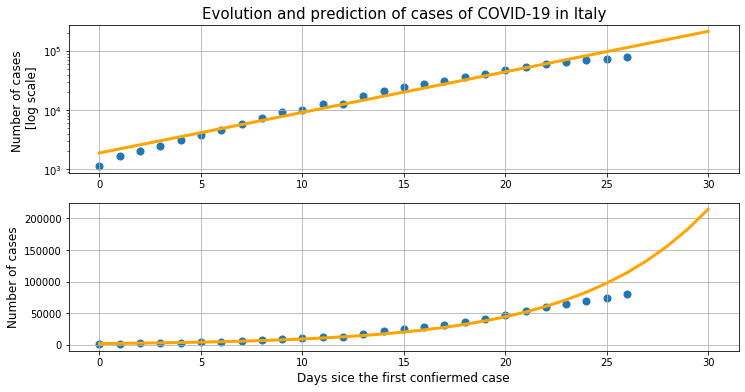

Days since first confirmed case was 27 days ago
Number of predicted cases in 4 days is 214523.07091875892
The score of this prediction is: 0.9780305612888831


In [21]:
prediction, score, data_country, days_infection = covid.predictor(df, 'Italy', DFN = 4, plot = True, degree = 1, pres = 0.0, min_cases = 1000)